In [16]:
data_15.index[0] == data_60.index[0]
data_15.index[-1] == data_60.index[-1]

True

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style("darkgrid")
%matplotlib inline

def stampToTime(timeStamp):#将时间戳转成字符串
    timeArray = time.localtime(timeStamp)
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    return otherStyleTime    
    
def timeToStamp(strTime):#将字符串转成时间戳
    timeArray = time.strptime(strTime, "%Y-%m-%d %H:%M:%S")
    timestamp = time.mktime(timeArray)
    return timestamp

data_15 = pd.read_csv("data_15min.csv")
data_15.index = data_15.time
data_15 = data_15.drop('time',axis = 1)
print(data_15)

data_60 = pd.read_csv("data_60min.csv")
data_60.index = data_60.time
data_60 = data_60.drop('time',axis = 1)
print(data_60)

               open     high      low    close  volume
time                                                  
1483282800  1.65701  1.65934  1.65628  1.65635   141.0
1483284000  1.65636  1.65649  1.65631  1.65646    33.0
1483285740  1.65647  1.65725  1.65640  1.65648    48.0
1483286820  1.65649  1.65888  1.65642  1.65750    94.0
1483288080  1.65750  1.65750  1.65718  1.65710   120.0
1483288980  1.65710  1.65750  1.65702  1.65707    94.0
1483289880  1.65706  1.65794  1.65706  1.65741    90.0
1483290780  1.65741  1.65761  1.65720  1.65746   106.0
1483291740  1.65728  1.65830  1.65721  1.65763   152.0
1483292640  1.65777  1.65804  1.65701  1.65763   153.0
1483293540  1.65765  1.65768  1.65572  1.65589   273.0
1483294440  1.65465  1.65738  1.65465  1.65738   123.0
1483295460  1.65738  1.65738  1.65733  1.65733    51.0
1483296360  1.65733  1.65743  1.65524  1.65628    90.0
1483297500  1.65628  1.65630  1.65534  1.65613  1433.0
1483298460  1.65614  1.65710  1.65603  1.65705   120.0
1483299360

In [6]:
a = data_15.index.tolist()
for i in range(len(data_15)):
    a[i] = stampToTime(data_15.index[i])
data_15.index = a

a = data_60.index.tolist()
for i in range(len(data_60)):
    a[i] = stampToTime(data_60.index[i])
data_60.index = a

In [20]:
data_15.describe().iloc[1:,:]

,open,high,low,close,volume
mean,1.700468,1.701105,1.699829,1.700469,1487.982858
std,0.051137,0.051137,0.051138,0.051137,845.608450
min,1.575080,1.576620,1.573580,1.575090,3.000000
25%,1.662480,1.663172,1.661810,1.662482,839.000000
50%,1.697070,1.697690,1.696410,1.697080,1379.000000
75%,1.736457,1.737100,1.735780,1.736460,1984.000000
max,1.840760,1.841500,1.839800,1.840730,12193.000000


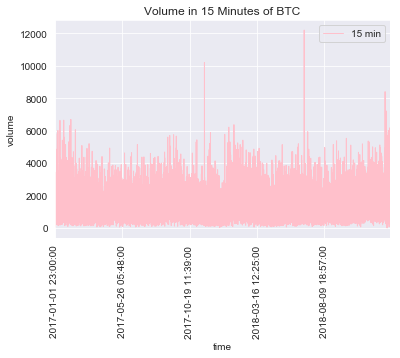

In [7]:
data_15.loc[:,'volume'].plot(label='15 min',color='pink',linewidth=1)
plt.xlabel("time")
plt.ylabel("volume")
plt.title("Volume in 15 Minutes of BTC")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

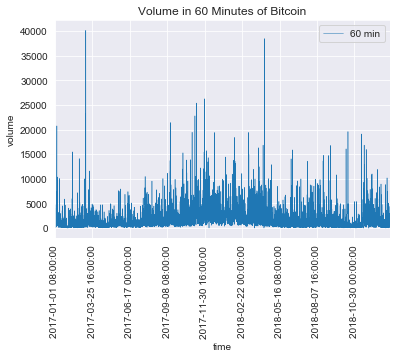

In [4]:
data_60.loc[:,'volume'].plot(label='60 min',linewidth=0.5)
plt.xlabel("time")
plt.ylabel("volume")
plt.title("Volume in 60 Minutes of Bitcoin")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

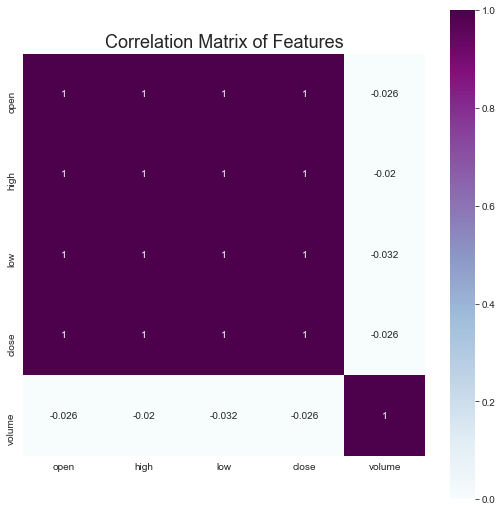

In [33]:

fig, ax = plt.subplots(figsize = (9,9))
#二维的数组的热力图，横轴和数轴的ticklabels要加上去的话，既可以通过将array转换成有column
#和index的DataFrame直接绘图生成，也可以后续再加上去。后面加上去的话，更灵活，包括可设置labels大小方向等。
sns.heatmap(data_15.corr(), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="BuPu")#sns.heatmap(np.round(a,2), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, 
#            square=True, cmap="BuRd")
ax.set_title('Correlation Matrix of Features', fontsize = 18)
#ax.set_ylabel('数字', fontsize = 18)
#ax.set_xlabel('字母', fontsize = 18)
plt.show()

In [6]:
data_15.describe().iloc[1:,:]

,open,high,low,close,volume
mean,5708.908123,5728.871532,5688.256190,5708.951836,365.982334
std,3679.264073,3698.905713,3658.589940,3679.252426,559.929151
min,748.350000,760.890000,735.000000,744.480000,0.000000
25%,2567.400000,2575.000000,2559.957969,2567.700000,85.776167
50%,6141.100000,6158.800000,6126.000000,6141.400000,195.861854
75%,7615.000000,7632.100000,7599.500000,7615.000000,421.406740
max,19858.000000,19891.000000,19826.000000,19858.000000,26075.258350


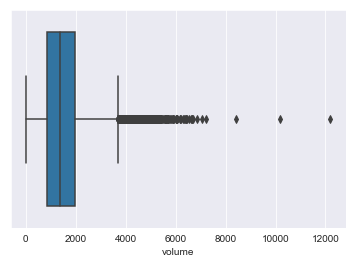

In [21]:
sns.boxplot(data_15.loc[:,'volume'])
plt.show()

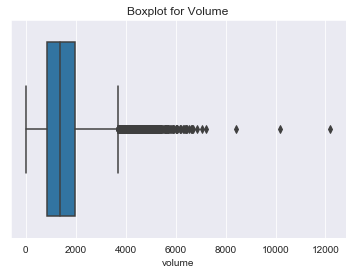

In [22]:
ax = sns.boxplot(data_15.loc[:,'volume'])
plt.title("Boxplot for Volume")
plt.show()

In [9]:
data_15.max()

open      19858.00000
high      19891.00000
low       19826.00000
close     19858.00000
volume    26075.25835
dtype: float64

                        open     high      low    close   volume
2017-11-21 08:17:00  1.69948  1.70085  1.69817  1.70036  10195.0
2018-06-27 12:43:00  1.75398  1.75433  1.75181  1.75217  12193.0
2018-12-19 18:59:00  1.70147  1.70259  1.69960  1.70254   8398.0
2018-12-19 19:59:00  1.70372  1.70410  1.70197  1.70235   7052.0
2018-12-21 15:49:00  1.71254  1.71853  1.71228  1.71624   7203.0


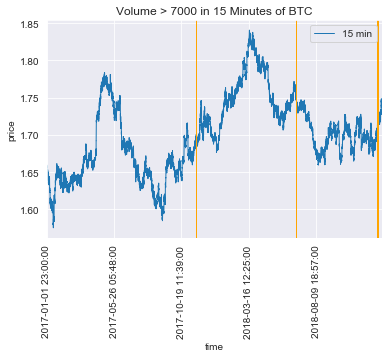

In [38]:
threhold = 7000
a = data_15[data_15.volume >threhold].index
print(data_15[data_15.volume >threhold])
b = []
for i in range(len(data_15.index)):
    if data_15.index[i] in a:
        b.append(i)
data_15.loc[:,'close'].plot(label='15 min',linewidth=1)
plt.xlabel("time")
for i in b:
    #print(i)
    plt.axvline(x=i, color='orange', linewidth=1);
plt.ylabel("price")
plt.title("Volume > "+str(threhold)+" in 15 Minutes of BTC")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [43]:
from statsmodels.tsa import stattools
plt.stem(stattools.acf(data_15.close,True,1000),linewidth=0.1)
#print(stattools.acf(data_15.close,True,1000))

TypeError: stem() got an unexpected keyword argument 'linewidth'

In [47]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    #f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    #f = plt.figure(facecolor='white')
    #ax1 = f.add_subplot(211)
    plot_acf(ts, lags=lags)
    plt.title('Autocorrelation of Volume')
    plt.xlabel("Lags")
    plt.ylabel("Correlation")
    plt.show()
    #ax2 = f.add_subplot(221)
    plot_pacf(ts, lags=lags)
    plt.title('Partial Autocorrelation of Volume')
    plt.xlabel("Lags")
    plt.ylabel("Correlation")
    plt.show()

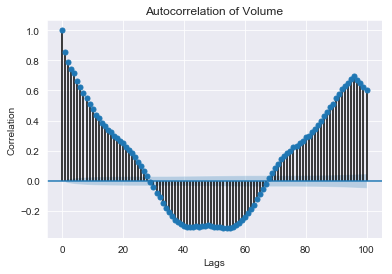

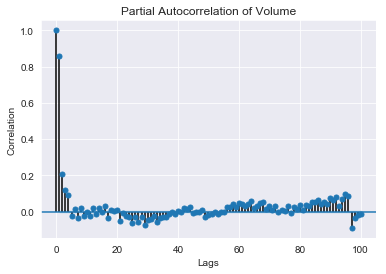

In [48]:
draw_acf_pacf(data_15.volume.iloc[:],100)
#draw_acf_pacf(data_15.close,63)

In [65]:
from arch.unitroot import ADF,KPSS
i = 0
KPSS(data_15.volume.iloc[i:])

Test Statistic,1.105
P-value,0.001
Lags,123


In [ ]:
plt.stem()